In [25]:
import requests
import pandas as pd
import numpy as np
import sys
import os
import psycopg2
from psycopg2 import OperationalError, errorcodes, errors 
sys.path.append(os.path.abspath('../'))
from src import soporte_tablas as st
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
conexion = st.conexion("Salud")
cursor = conexion.cursor()

In [ ]:
cursor.execute("SELECT * FROM ejercicios;")
datos_ejercicios = cursor.fetchall() 
columnas_ejercicios = [desc[0] for desc in cursor.description]  
df_ejercicios = pd.DataFrame(datos_ejercicios, columns=columnas_ejercicios)  

In [9]:
df_ejercicios.head(2)               #datos obtenidos de la base de datos. El objetivo es poder filtrar por dificultad 
                                    #por musculo por tipo para asi encontrar una rutina a corde a tus propositos
                                    #por ahora solo tenemos dificultad intermedia el resto de categorias si se han obtenido

,id,nombre,tipo,musculo,equipo,dificultad,instrucciones
0,1,Jumping rope,cardio,quadriceps,body_only,intermediate,Hold an end of the rope in each hand. Position...
1,2,Stair climber,cardio,quadriceps,machine,intermediate,"To begin, step onto the stepmill and select th..."


In [15]:
df_ejercicios.count()               #9930 rutinas.

id               9930
nombre           9930
tipo             9930
musculo          9930
equipo           9930
dificultad       9930
instrucciones    9930
dtype: int64

In [4]:
cursor.execute("SELECT * FROM productos_fit;")
datos_productos_fit = cursor.fetchall()
columnas_productos_fit = [desc[0] for desc in cursor.description]
df_productos_fit = pd.DataFrame(datos_productos_fit, columns=columnas_productos_fit)

In [10]:
df_productos_fit.head(2)                    #datos obtenidos del scrap a la pagina fuertisimo.as_integer_ratio          
                                            # tenemos precio las cantidades de reseñas y su rating medio
                                            #el peso del suplemento la unida de medida de este 

,producto_id,tipo_producto,nombre,precio,cantidad_reseñas,descripcion,rating,peso,unidad,ejercicio_id
0,1,suplemento,Real IsolatePRO,69.9,11.0,Real IsolatePRO presenta un elevado porcentaje...,4.3,2.0,Kg,1
1,2,suplemento,NaN,76.3,127.0,Whey Pure Fusion de Amix es una proteína obten...,4.7,0.0,NaN,2


In [17]:
df_productos_fit.count()                    #hemos obtenido 100 productos completos. 
                                            #rating tiene algun nulo puesto que hay productos que no son reseñados 
                                            #esta preparado el escrapeo para incluir mas producto pero nuestro objetivo incial 
                                            #ahora mismo no era ese, por cada click se pueden añadir 20 productos mas siendo el 
                                            #selector el mismo.
                                            #haremos un estudio de precio y satisfacion mas tarde

producto_id         100
tipo_producto       100
nombre              100
precio              100
cantidad_reseñas    100
descripcion         100
rating               96
peso                100
unidad              100
ejercicio_id        100
dtype: int64

In [5]:
cursor.execute("SELECT * FROM productos_fresh;")
datos_productos_fresh = cursor.fetchall()
columnas_productos_fresh = [desc[0] for desc in cursor.description]
df_productos_fresh = pd.DataFrame(datos_productos_fresh, columns=columnas_productos_fresh)

In [13]:
df_productos_fresh.head(2)                  #resultados de scrap de ahorra mas de productos de la seccion frescos.
                                            #nombre y peso algunos no ponen peso o lo ponen aprox por lo que no lo hemos separado.3
                                            #el descuento de cada producto y los precios.

,id,producto_id,nombre_y_peso,descuentos,precio_actual,precio_sin_descuento
0,1,1,LOTE 2 kg de pechugas de pollo,-20.0,6.39,7.99
1,2,2,Salmón por medios o enteros peso aproximado pi...,-8.0,10.99,11.99


In [18]:
df_productos_fresh.count()                  #hemos obtenido 23 productos completos. 
                                            #precio actual y precio sin descuento tiene nulos al resultar algun descuento ser 0 
                                            #esta preparado el escrapeo para incluir mas producto pero nuestro objetivo incial 
                                            #ahora mismo no era ese, por cada click se pueden añadir 20 productos mas siendo el 
                                            #selector el mismo.
                                            #haremos un estudio de precio y satisfacion mas tarde

id                      23
producto_id             23
nombre_y_peso           23
descuentos              23
precio_actual           21
precio_sin_descuento    21
dtype: int64

In [7]:
cursor.execute("SELECT * FROM recetas;")
datos_recetas = cursor.fetchall()
columnas_recetas = [desc[0] for desc in cursor.description]
df_recetas = pd.DataFrame(datos_recetas, columns=columnas_recetas)

In [12]:
df_recetas.head(2)                          #datos obtenidos de api recetas
                                            # punto a mejorar, ya tenia el montaje realizado y se me acabaron las llamadas 
                                            #proximos pasos encontrar una api mejor para este punto.
                                            #las recetas estan filtradas para que sean recetas de proteinas, snack, ensalada, healthy...

,id,producto_id,nombre_compilacion,descripcion_compilacion,idioma,nombre,slug,url_miniatura,url_video,rinde,numero_de_receta
0,1,1,Protein-Packed Snacks,"Whether you’re trying to be healthy, pulling a...",eng,Low-Carb Avocado Chicken Salad,low-carb-avocado-chicken-salad,https://img.buzzfeed.com/thumbnailer-prod-us-e...,https://vid.tasty.co/output/121934/hls24_15468...,Servings: 4,4704
1,2,2,5 Easy & Healthy Avocado Recipes,NaN,eng,Low-Carb Avocado Chicken Salad,low-carb-avocado-chicken-salad,https://img.buzzfeed.com/thumbnailer-prod-us-e...,https://vid.tasty.co/output/121934/hls24_15468...,Servings: 4,4704


In [19]:
df_recetas.count()                  #observamos 29 recetas.
                                    #Al igual que antes si estabamos preparados para obtener mas datos.
                                    #en este caso hemos intentado obtener mas datos, mejoraremos la APi

id                         29
producto_id                29
nombre_compilacion         29
descripcion_compilacion    29
idioma                     29
nombre                     29
slug                       29
url_miniatura              29
url_video                  29
rinde                      29
numero_de_receta           29
dtype: int64

**Estudios de los Precios**

In [21]:
precio_medio = df_productos_fit['precio'].mean()
precio_mediano = df_productos_fit['precio'].median()
precio_maximo = df_productos_fit['precio'].max()
precio_minimo = df_productos_fit['precio'].min()
print("Precio medio:", precio_medio)
print("Precio mediano:", precio_mediano)
print("Precio máximo:", precio_maximo)
print("Precio mínimo:", precio_minimo)

Precio medio: 37.6307
Precio mediano: 30.22
Precio máximo: 128.9
Precio mínimo: 8.9


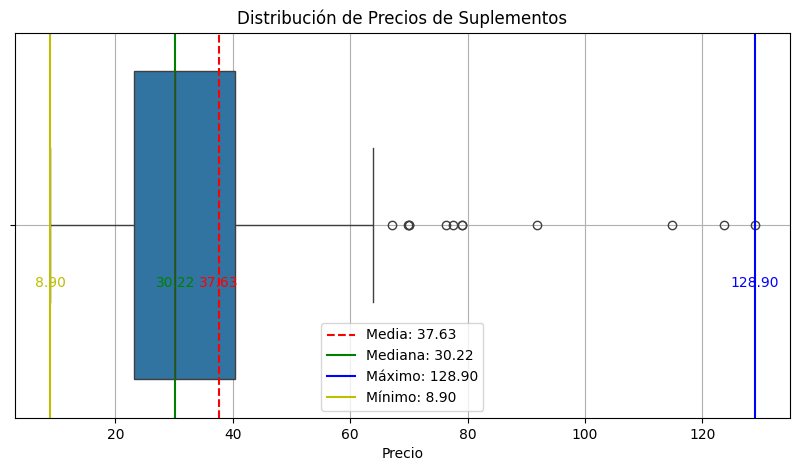

In [30]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_productos_fit['precio'])
plt.title('Distribución de Precios de Suplementos')
plt.xlabel('Precio')
plt.grid(True)

# Agregar líneas para la media, mediana, máximo y mínimo
plt.axvline(precio_medio, color='r', linestyle='--', label=f'Media: {precio_medio:.2f}')
plt.axvline(precio_mediano, color='g', linestyle='-', label=f'Mediana: {precio_mediano:.2f}')
plt.axvline(precio_maximo, color='b', linestyle='-', label=f'Máximo: {precio_maximo:.2f}')
plt.axvline(precio_minimo, color='y', linestyle='-', label=f'Mínimo: {precio_minimo:.2f}')

# Agregar etiquetas
plt.text(precio_medio, 0.15, f'{precio_medio:.2f}', color='r', ha='center', va='center')
plt.text(precio_mediano, 0.15, f'{precio_mediano:.2f}', color='g', ha='center', va='center')
plt.text(precio_maximo, 0.15, f'{precio_maximo:.2f}', color='b', ha='center', va='center')
plt.text(precio_minimo, 0.15, f'{precio_minimo:.2f}', color='y', ha='center', va='center')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

Q1 en el min , Q2 mediana, Q3=40  Q4 final de la caja 
El 75% de los valores en el conjunto de datos son menores o iguales a Q3
 

In [32]:
rating_medio = df_productos_fit['rating'].mean()
rating_mediano = df_productos_fit['rating'].median()
rating_maximo = df_productos_fit['rating'].max()
rating_minimo = df_productos_fit['rating'].min()

print("Rating medio:", rating_medio)
print("Rating mediano:", rating_mediano)                       #satisfaccion con respecto a los precios de los suplementos
print("Rating máximo:", rating_maximo)
print("Rating mínimo:", rating_minimo)


Rating medio: 4.658333333333334
Rating mediano: 4.7
Rating máximo: 5.0
Rating mínimo: 4.0


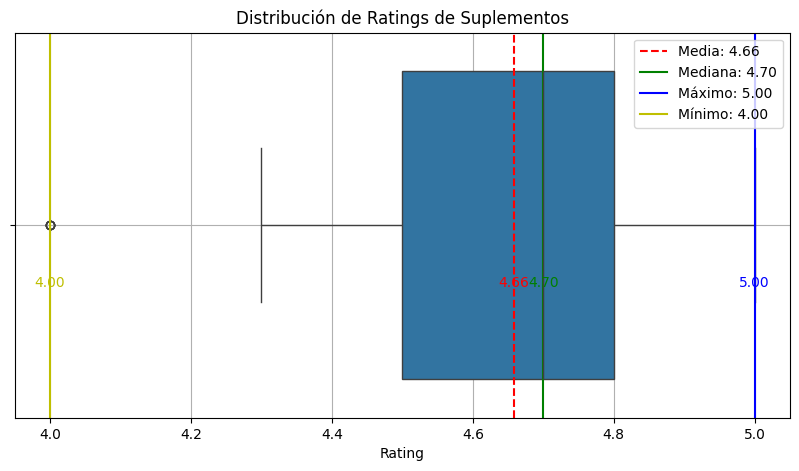

In [33]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_productos_fit['rating'])
plt.title('Distribución de Ratings de Suplementos')
plt.xlabel('Rating')
plt.grid(True)

# Agregar líneas para la media, mediana, máximo y mínimo
plt.axvline(rating_medio, color='r', linestyle='--', label=f'Media: {rating_medio:.2f}')
plt.axvline(rating_mediano, color='g', linestyle='-', label=f'Mediana: {rating_mediano:.2f}')
plt.axvline(rating_maximo, color='b', linestyle='-', label=f'Máximo: {rating_maximo:.2f}')
plt.axvline(rating_minimo, color='y', linestyle='-', label=f'Mínimo: {rating_minimo:.2f}')

# Agregar etiquetas
plt.text(rating_medio, 0.15, f'{rating_medio:.2f}', color='r', ha='center', va='center')
plt.text(rating_mediano, 0.15, f'{rating_mediano:.2f}', color='g', ha='center', va='center')
plt.text(rating_maximo, 0.15, f'{rating_maximo:.2f}', color='b', ha='center', va='center')
plt.text(rating_minimo, 0.15, f'{rating_minimo:.2f}', color='y', ha='center', va='center')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()


In [61]:
for term in ['protein','Whey']: df_filtrado_protes = df_productos_fit[df_productos_fit['nombre'].str.contains(term, case=False, na=False)]


In [ ]:
for termino in ['Creatine']: df_filtrado_creatina = df_productos_fit[df_productos_fit['nombre'].str.contains(termino, case=False, na=False)]
for termino in ['L-Carnitine']: df_filtrado_Carnitine= df_productos_fit[df_productos_fit['nombre'].str.contains(termino, case=False, na=False)]
for termino in ['BCAA']: df_filtrado_BCAS= df_productos_fit[df_productos_fit['nombre'].str.contains(termino, case=False, na=False)]

In [69]:
minp = df_filtrado_protes['precio'].min()                            #datos para las proteinas solo
maxp = df_filtrado_protes['precio'].max() 
mediap = df_filtrado_protes['precio'].mean() 
medianap = df_filtrado_protes['precio'].median() 
print(f"\nEstadísticas para proteinas:") 
print(f"Precio mínimo: {min}") 
print(f"Precio máximo: {max}") 
print(f"Precio medio: {mediap}") 
print(f"Precio mediano: {medianap}")


Estadísticas para proteinas:
Precio mínimo: 16.92
Precio máximo: 18.15
Precio medio: 55.70777777777778
Precio mediano: 34.9


In [70]:
minc = df_filtrado_creatina['precio'].min()                            #datos para las creatina solo
maxc = df_filtrado_creatina['precio'].max() 
mediac = df_filtrado_creatina['precio'].mean() 
medianac = df_filtrado_creatina['precio'].median() 
print(f"\nEstadísticas para creatina:") 
print(f"Precio mínimo: {minc}") 
print(f"Precio máximo: {maxc}") 
print(f"Precio medio: {mediac}") 
print(f"Precio mediano: {medianac}")


Estadísticas para creatina:
Precio mínimo: 17.5
Precio máximo: 53.9
Precio medio: 30.738999999999997
Precio mediano: 29.945


In [71]:
minb = df_filtrado_BCAS['precio'].min()                            #datos para las proteinas solo
maxb = df_filtrado_BCAS['precio'].max() 
mediab = df_filtrado_BCAS['precio'].mean() 
medianab = df_filtrado_BCAS['precio'].median() 
print(f"\nEstadísticas para BCAS:") 
print(f"Precio mínimo: {min}") 
print(f"Precio máximo: {max}") 
print(f"Precio medio: {mediab}") 
print(f"Precio mediano: {medianab}")


Estadísticas para BCAS:
Precio mínimo: 16.92
Precio máximo: 18.15
Precio medio: 26.694
Precio mediano: 26.85


In [72]:
minl = df_filtrado_Carnitine['precio'].min()                            #datos para las proteinas solo
maxl = df_filtrado_Carnitine['precio'].max() 
medial = df_filtrado_Carnitine['precio'].mean() 
medianal = df_filtrado_Carnitine['precio'].median() 
print(f"\nEstadísticas para L-Carnitine:") 
print(f"Precio mínimo: {min}") 
print(f"Precio máximo: {max}") 
print(f"Precio medio: {medial}") 
print(f"Precio mediano: {medianal}")


Estadísticas para L-Carnitine:
Precio mínimo: 16.92
Precio máximo: 18.15
Precio medio: 17.74
Precio mediano: 18.15


In [74]:
etiquetas = ['Proteínas', 'Creatina', 'BCAAs', 'L-Carnitina']
minimos = [minp, minc, minb,minl]
maximos = [maxp, maxc, maxb,maxl]
medias = [mediap, mediac, mediab,medial]
medianas = [medianap, medianac, medianab,medianal]

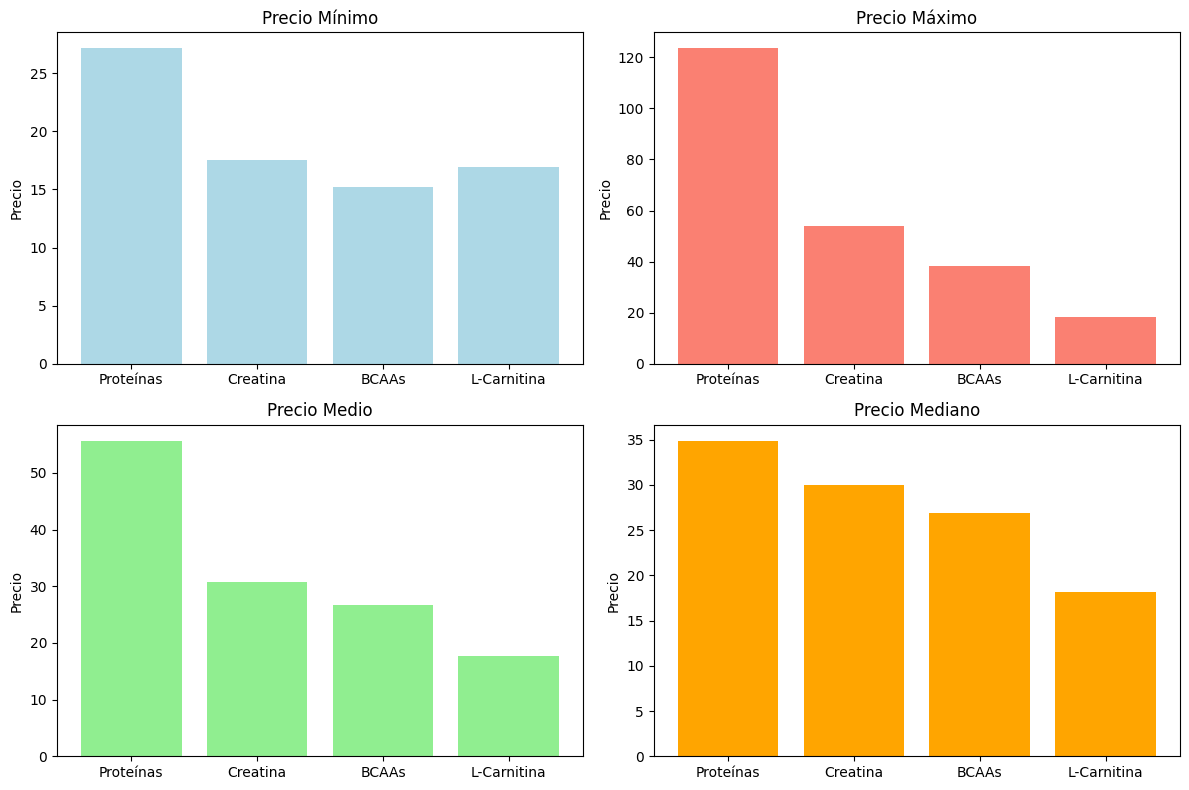

In [77]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs[0, 0].bar(etiquetas, minimos, color='lightblue')
axs[0, 0].set_title('Precio Mínimo')
axs[0, 1].bar(etiquetas, maximos, color='salmon')
axs[0, 1].set_title('Precio Máximo')
axs[1, 0].bar(etiquetas, medias, color='lightgreen')
axs[1, 0].set_title('Precio Medio')
axs[1, 1].bar(etiquetas, medianas, color='orange')
axs[1, 1].set_title('Precio Mediano')

# Añadir etiquetas y ajustar el diseño
for ax in axs.flat:
    ax.set_ylabel('Precio')
    ax.set_ylim()  # Ajustar límite superior para visualización

plt.tight_layout()
plt.show()

In [79]:
df_productos_fresh.head()

,id,producto_id,nombre_y_peso,descuentos,precio_actual,precio_sin_descuento
0,1,1,LOTE 2 kg de pechugas de pollo,-20.0,6.39,7.99
1,2,2,Salmón por medios o enteros peso aproximado pi...,-8.0,10.99,11.99
2,3,3,Lubina de ración pieza 400g aprox 2 uds,-30.0,NaN,NaN
3,4,4,LOTE 2kg de contramuslos de pollo,-20.0,4.79,5.99
4,5,5,LOTE 2kg de alas de pollo,-20.0,3.99,4.99


In [80]:
precio_actual = df_productos_fresh['precio_actual']
precio_actual_stats = {
    'min': precio_actual.min(),
    'max': precio_actual.max(),
    'media': precio_actual.mean(),
    'mediana': precio_actual.median()}

print("Estadísticas para 'precio_actual':")
print(f"Precio mínimo: {precio_actual_stats['min']}")
print(f"Precio máximo: {precio_actual_stats['max']}")
print(f"Precio medio: {precio_actual_stats['media']}")
print(f"Precio mediano: {precio_actual_stats['mediana']}")


Estadísticas para 'precio_actual':
Precio mínimo: 1.39
Precio máximo: 27.99
Precio medio: 10.13809523809524
Precio mediano: 9.49


In [83]:
precio_sin_descuento = df_productos_fresh['precio_sin_descuento']
precio_sin_descuento_stats = {
    'min': precio_sin_descuento.min(),
    'max': precio_sin_descuento.max(),
    'media': precio_sin_descuento.mean(),
    'mediana': precio_sin_descuento.median()
}

print("\nEstadísticas para 'precio_sin_descuento':")
print(f"Precio mínimo: {precio_sin_descuento_stats['min']}")
print(f"Precio máximo: {precio_sin_descuento_stats['max']}")
print(f"Precio medio: {precio_sin_descuento_stats['media']}")
print(f"Precio mediano: {precio_sin_descuento_stats['mediana']}")



Estadísticas para 'precio_sin_descuento':
Precio mínimo: 1.79
Precio máximo: 29.99
Precio medio: 11.746666666666666
Precio mediano: 11.99


In [84]:

# Cálculo de estadísticas para 'descuentos'
descuentos = df_productos_fresh['descuentos']
descuentos_stats = {
    'min': descuentos.min(),
    'max': descuentos.max(),
    'media': descuentos.mean(),
    'mediana': descuentos.median()
}
print("\nEstadísticas para 'descuentos':")
print(f"Descuento maximo: {descuentos_stats['min']}")
print(f"Descuento min: {descuentos_stats['max']}")
print(f"Descuento medio: {descuentos_stats['media']}")
print(f"Descuento mediano: {descuentos_stats['mediana']}")


Estadísticas para 'descuentos':
Descuento mínimo: -49.0
Descuento máximo: -5.0
Descuento medio: -18.47826086956522
Descuento mediano: -20.0


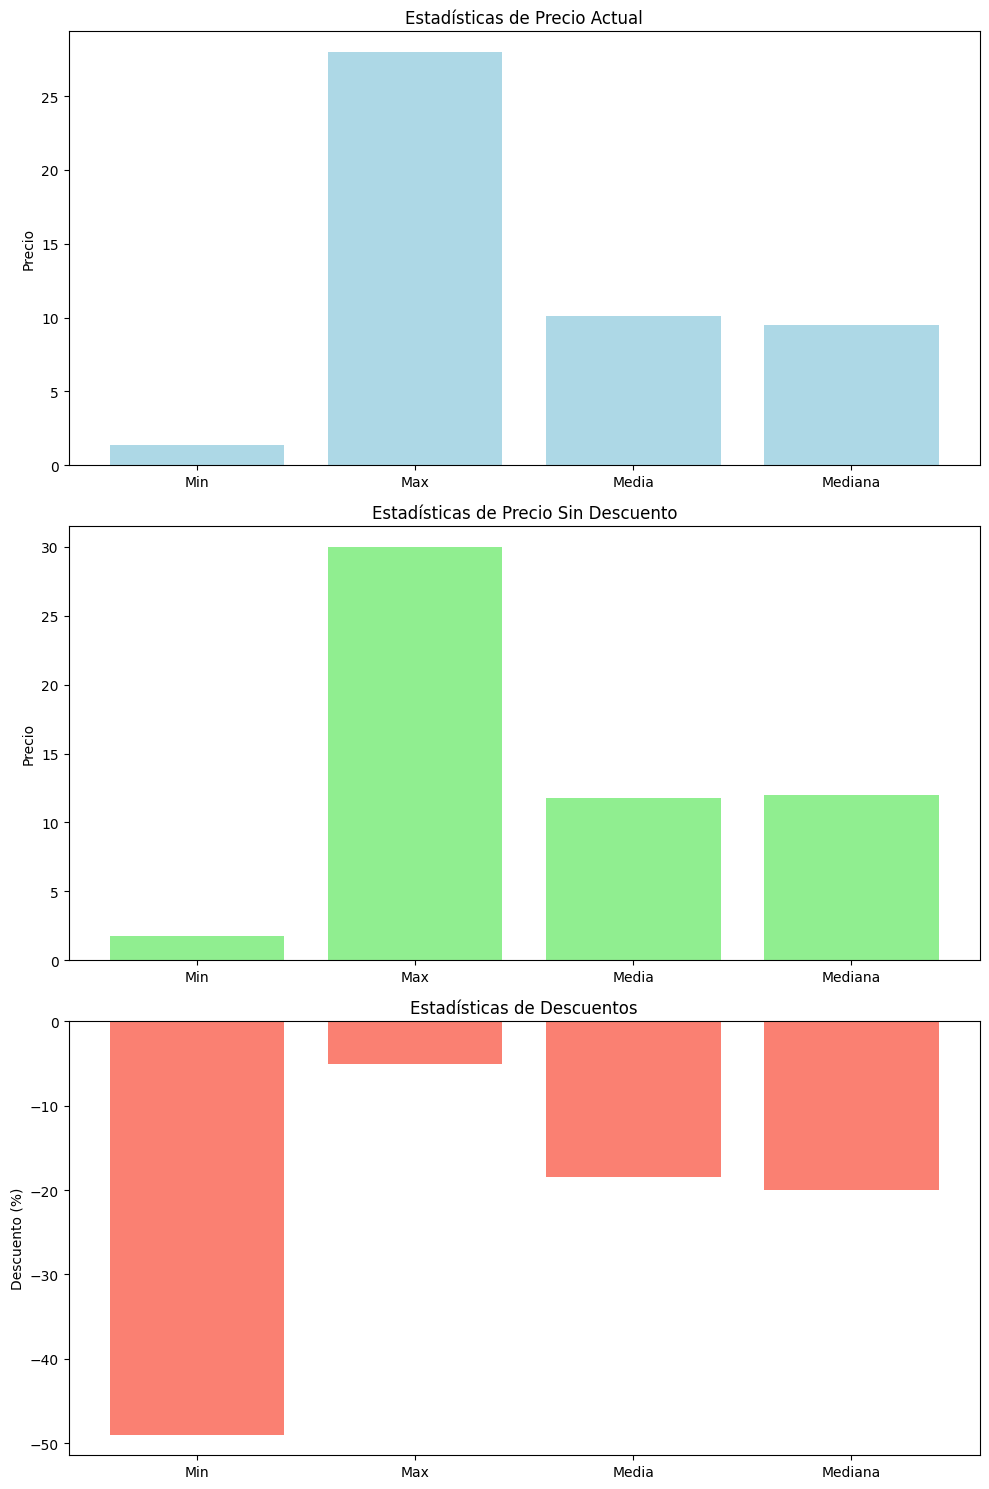

In [86]:
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Gráfico para precio_actual
axs[0].bar(['Min', 'Max', 'Media', 'Mediana'], 
            [precio_actual_stats['min'], precio_actual_stats['max'], 
             precio_actual_stats['media'], precio_actual_stats['mediana']],
            color='lightblue')
axs[0].set_title('Estadísticas de Precio Actual')
axs[0].set_ylabel('Precio')
axs[0].set_ylim()  

# Gráfico para precio_sin_descuento
axs[1].bar(['Min', 'Max', 'Media', 'Mediana'], 
            [precio_sin_descuento_stats['min'], precio_sin_descuento_stats['max'], 
             precio_sin_descuento_stats['media'], precio_sin_descuento_stats['mediana']],
            color='lightgreen')
axs[1].set_title('Estadísticas de Precio Sin Descuento')
axs[1].set_ylabel('Precio')
axs[1].set_ylim() 

# Gráfico para descuentos
axs[2].bar(['Min', 'Max', 'Media', 'Mediana'], 
            [descuentos_stats['min'], descuentos_stats['max'], 
             descuentos_stats['media'], descuentos_stats['mediana']],
            color='salmon')
axs[2].set_title('Estadísticas de Descuentos')
axs[2].set_ylabel('Descuento (%)')

# Ajustar diseño
plt.tight_layout()
plt.show()

In [97]:
terminos_fresh = ['salmón', 'pollo', 'cerdo']
df_filtrado_fresh = df_productos_fresh[df_productos_fresh['nombre_y_peso'].str.contains('|'.join(terminos_fresh), case=False, na=False)]
df_filtrado_fresh

,id,producto_id,nombre_y_peso,descuentos,precio_actual,precio_sin_descuento
0,1,1,LOTE 2 kg de pechugas de pollo,-20.0,6.39,7.99
1,2,2,Salmón por medios o enteros peso aproximado pi...,-8.0,10.99,11.99
3,4,4,LOTE 2kg de contramuslos de pollo,-20.0,4.79,5.99
4,5,5,LOTE 2kg de alas de pollo,-20.0,3.99,4.99
9,10,10,LOTE 2 kg de traseros de pollo,-20.0,3.19,3.99
11,12,12,LOTE 2kg de jamoncitos de pollo,-20.0,3.99,4.99
14,15,15,Croquetas de pollo y jamón,-20.0,7.19,8.99
19,20,20,Repollo,-22.0,1.39,1.79


In [ ]:
media_descuentos = df_filtrado_fresh['descuentos'].mean()
print(f"Media de descuentos: {media_descuentos}")                           #aqui si me da tiempo sacar comparativas de lo que te ahorras 
                                                                            #con respecto a las categorias.

Media de descuentos: -18.75


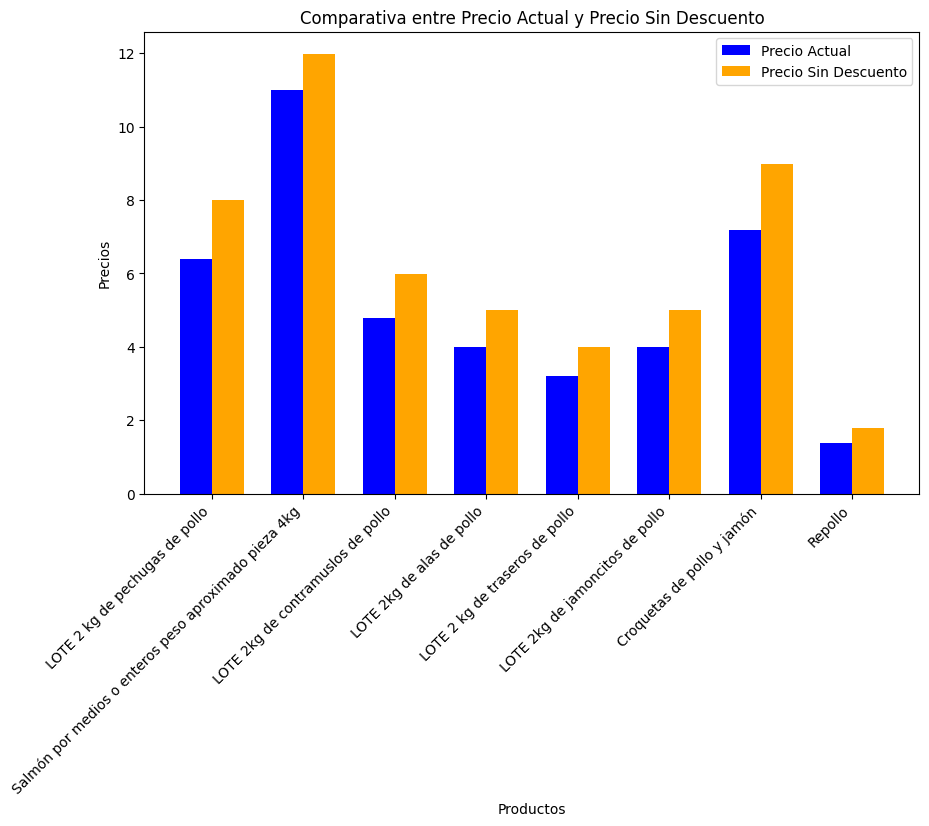

In [98]:
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(df_filtrado_fresh))

# Gráfico de barras para precios actuales y precios sin descuento
plt.bar(index, df_filtrado_fresh['precio_actual'], width=bar_width, label='Precio Actual', color='blue')
plt.bar([i + bar_width for i in index],df_filtrado_fresh['precio_sin_descuento'], width=bar_width, label='Precio Sin Descuento', color='orange')

# Personalizar gráfico
plt.xlabel('Productos')
plt.ylabel('Precios')
plt.title('Comparativa entre Precio Actual y Precio Sin Descuento')
plt.xticks([i + bar_width / 2 for i in index], df_filtrado_fresh['nombre_y_peso'], rotation=45, ha='right')
plt.legend()


Analisis de rutinas y recetas.
En este apartado el objetivo sera obtener las rutinas y las recetas que pudieran interesarnos para nuestros objetivos.

In [102]:
df_ejercicios.head(2)

,id,nombre,tipo,musculo,equipo,dificultad,instrucciones
0,1,Jumping rope,cardio,quadriceps,body_only,intermediate,Hold an end of the rope in each hand. Position...
1,2,Stair climber,cardio,quadriceps,machine,intermediate,"To begin, step onto the stepmill and select th..."


In [105]:
df_ejercicios['nombre'].unique()

array(['Jumping rope', 'Stair climber', 'Bicycling', 'Rower',
       'Elliptical trainer', 'Stairmaster', 'Burpee',
       'Trail Running/Walking', 'Treadmill running'], dtype=object)

In [106]:
df_ejercicios['equipo'].unique()

array(['body_only', 'machine', 'other'], dtype=object)

In [108]:
df_ejercicios['musculo'].unique()

array(['quadriceps', 'middle_back'], dtype=object)

Al estar en una fase incial tenemos muchos ejercicios pero pocos filtros, pero podriamos tener un ejemplo de filtrado asi.

In [111]:
df_rutina = df_ejercicios[(df_ejercicios['equipo'] == 'machine') & 
                 (df_ejercicios['dificultad'] == 'intermediate') & 
                 (df_ejercicios['musculo'] == 'quadriceps')]

print(df_rutina)                                                                    #diseñamos una rutina con maquinas para cuadriceps 
                                                                                    #dificultad intermedia
                                                                                    #Obtenemos 3972 rutinas
                                                                                    #podemos filtar por tipo de ejercicio para hacer la
                                                                                    #lista mas corta

        id              nombre    tipo     musculo   equipo    dificultad  \
1        2       Stair climber  cardio  quadriceps  machine  intermediate   
4        5  Elliptical trainer  cardio  quadriceps  machine  intermediate   
5        6         Stairmaster  cardio  quadriceps  machine  intermediate   
9       10   Treadmill running  cardio  quadriceps  machine  intermediate   
11      12       Stair climber  cardio  quadriceps  machine  intermediate   
...    ...                 ...     ...         ...      ...           ...   
9919  9920   Treadmill running  cardio  quadriceps  machine  intermediate   
9921  9922       Stair climber  cardio  quadriceps  machine  intermediate   
9924  9925  Elliptical trainer  cardio  quadriceps  machine  intermediate   
9925  9926         Stairmaster  cardio  quadriceps  machine  intermediate   
9929  9930   Treadmill running  cardio  quadriceps  machine  intermediate   

                                          instrucciones  
1     To begin, s

En este punto vamos a analizar las recetas haciendo algo similar a lo que hemos realizado con las rutinas
Vamos a ver que receta queremos y nos vamos a quedar con ella.

In [113]:
df_recetas['nombre_compilacion']                

0                                 Protein-Packed Snacks
1                      5 Easy & Healthy Avocado Recipes
2                     Healthy And Delicious Appetisers 
3                Healthy Snacks For Late-night Cravings
4          Easy Snacks To Pack For Your Next Beach Trip
5                      Low Carb Meals For A Healthy You
6                           31 Days 31 Avocado Recipes 
7          Make Healthy Snacks Tasty With These Recipes
8      Recipes For When You Don't Feel Like Working Out
9                               Use Your Yogurt Wisely!
10                      Tangy & Saucy Spaghetti Recipes
11                           Tasty's Best Pasta Recipes
12                5 Recipes Straight Out Of Middle East
13    Make The Perfect Bowl Of Pasta With These Recipes
14                                6 Keto-Friendly Meals
15                          5 Easy 2-Ingredient Recipes
16                 Keto-Friendly Weekday Dinner Recipes
17                                  Easy No-Bake

In [116]:
df_recetas['rinde'].unique()                    #La cantida para cuantas persona que se extrae de la receta

array(['Servings: 4', 'Servings: 1', 'Servings: 6-10'], dtype=object)

In [117]:
df_recetas['idioma'].unique()                   #idioma en el que la queremos 

array(['eng', 'und'], dtype=object)

In [119]:
#por lo que siguiendo el ejemplo de la rutina podemos hacer un filtrado de ejemplo de recetas.
df_receta = df_recetas[(df_recetas['idioma'] == 'eng') & (df_recetas['rinde'].str.contains('1', na=False))]

print(df_receta)                        #y aqui obtenemos las recetas con nuestras condiciones con imagenes y urls del video para hacerlo

    id  producto_id                            nombre_compilacion  \
24  24           24  Recipes For Your Golden Globes Viewing Party   
25  25           25                  Easy Recipes For Girls Night   

                              descripcion_compilacion idioma  \
24  This year, watch The Golden Globes with your f...    eng   
25  No girls night is complete without food! Set t...    eng   

                                  nombre  \
24  How To Make A Fresh Seacuterie Board   
25  How To Make A Fresh Seacuterie Board   

                                    slug  \
24  how-to-make-a-fresh-seacuterie-board   
25  how-to-make-a-fresh-seacuterie-board   

                                        url_miniatura  \
24  https://img.buzzfeed.com/thumbnailer-prod-us-e...   
25  https://img.buzzfeed.com/thumbnailer-prod-us-e...   

                                            url_video           rinde  \
24  https://vid.tasty.co/output/162704/hls24_15844...  Servings: 6-10   
25  https://vid